# GAM - Assignment-1

## Group Member Name:
1. THAKKAR PRACHI CHETAN CHETNA (2021SC04875)

### 1. Importing the required libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

### 2. Generating Random Graphs with 100 connected nodes.

In [2]:
# Generate a random connected graph with at least 100 nodes
graph = nx.gnm_random_graph(n=100, m=150)

# Ensure connectivity
while not nx.is_connected(graph):
    graph = nx.gnm_random_graph(n=100, m=150)

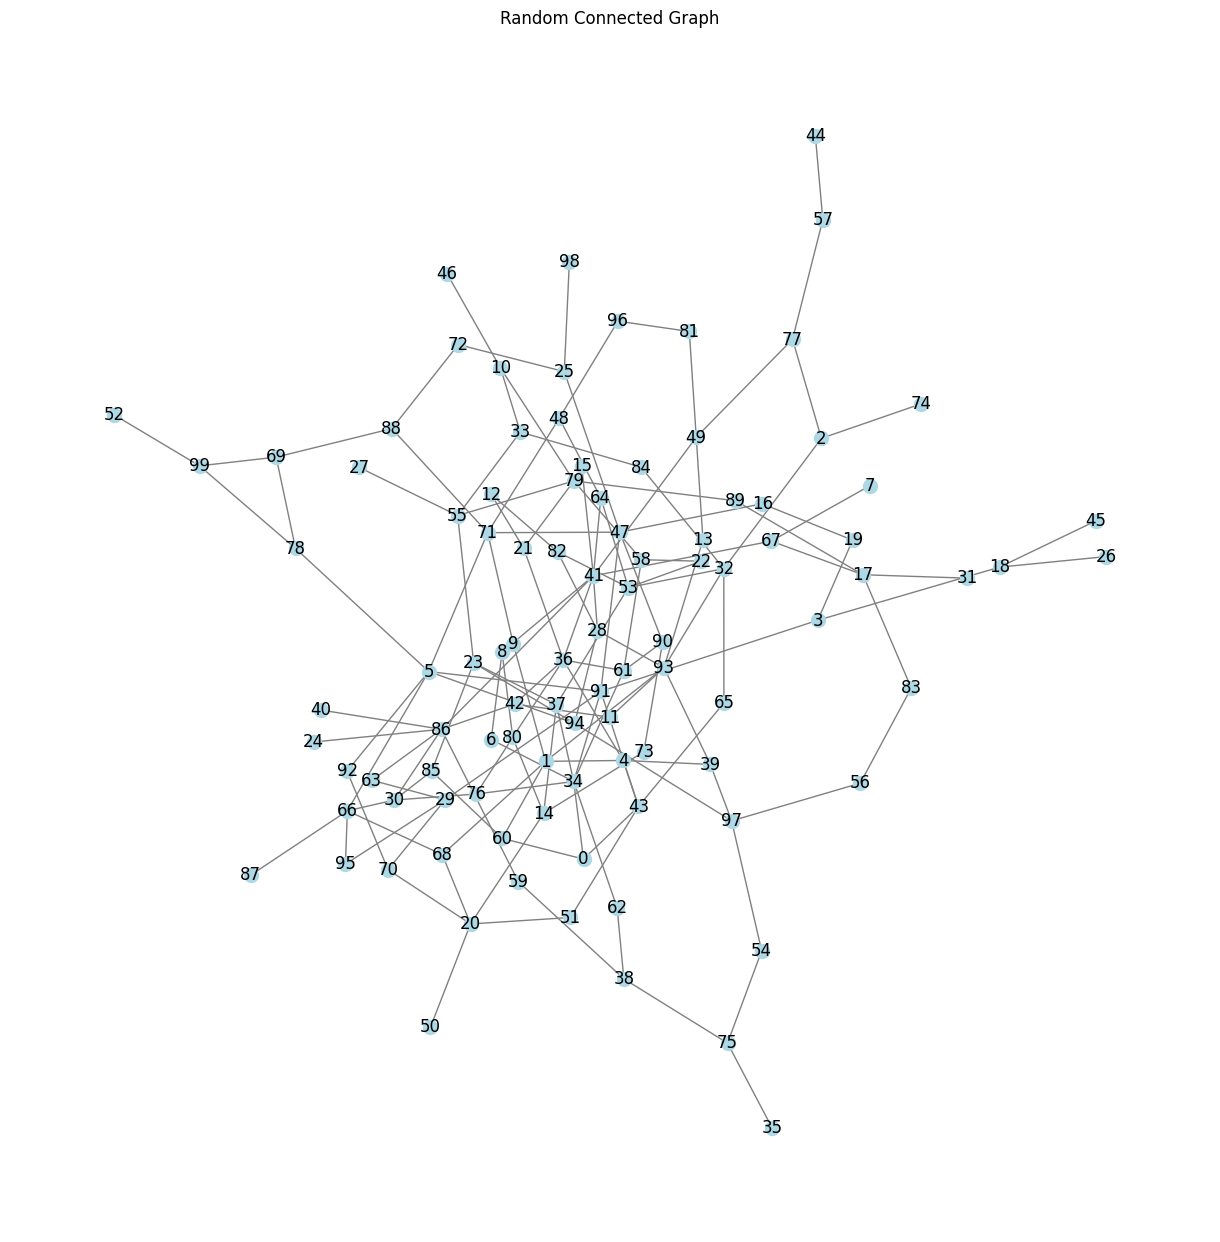

In [3]:
# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(graph, with_labels=True, node_color='lightblue', node_size=100, edge_color='gray')
plt.title("Random Connected Graph")
plt.show()

### 3. Network Measurement Activities

#### a. Eccentricity, Diameter

In [4]:
# Calculate Eccentricity
eccentricity = nx.eccentricity(graph)

# Calculate Diameter
diameter = nx.diameter(graph)

# Display Eccentricity and Diameter DataFrames
print("Diameter:", diameter)

# Convert Eccentricity dictionary to a list of tuples
eccentricity_list = [(node, ecc) for node, ecc in eccentricity.items()]

# Create a dataframe from Eccentricity list
df = pd.DataFrame(eccentricity_list, columns=['Node', 'Eccentricity'])

# Display the dataframe
print("Eccentricity:", diameter)
print(df)

Diameter: 10
Eccentricity: 10
    Node  Eccentricity
0      0             7
1      1             6
2      2             8
3      3             8
4      4             6
..   ...           ...
95    95             8
96    96             8
97    97             7
98    98            10
99    99             9

[100 rows x 2 columns]


#### b. Radius

In [5]:
# Calculate the Radius
radius = nx.radius(graph)

print("Radius:", radius)

Radius: 6


#### c. Centrality : Degree Centrality, EigenVector Centrality, Katz Centrality, Page Rank.

In [16]:
# Calculate Centrality Measures
degree_centrality = nx.degree_centrality(graph)
eigenvector_centrality = nx.eigenvector_centrality(graph)
katz_centrality = nx.katz_centrality(graph)
page_rank = nx.pagerank(graph)

# Convert Centrality dictionaries to Series
degree_centrality = pd.Series(degree_centrality)
eigenvector_centrality = pd.Series(eigenvector_centrality)
katz_centrality = pd.Series(katz_centrality)
page_rank = pd.Series(page_rank)

# Create DataFrame for Centrality Measures
centrality_df = pd.DataFrame({
    "Node": degree_centrality.index,
    "Degree Centrality": degree_centrality,
    "Eigenvector Centrality": eigenvector_centrality,
    "Katz Centrality": katz_centrality,
    "Page Rank": page_rank
})

# Display the DataFrame
print("Centrality Measures :")
print(centrality_df)

Centrality Measures :
    Node  Degree Centrality  Eigenvector Centrality  Katz Centrality  \
0      0           0.030303                0.124610         0.102526   
1      1           0.050505                0.148299         0.119996   
2      2           0.030303                0.041293         0.095484   
3      3           0.030303                0.068377         0.097992   
4      4           0.040404                0.168164         0.114254   
..   ...                ...                     ...              ...   
95    95           0.020202                0.058845         0.089095   
96    96           0.020202                0.025915         0.084801   
97    97           0.040404                0.070332         0.105091   
98    98           0.010101                0.010213         0.075946   
99    99           0.030303                0.025244         0.093477   

    Page Rank  
0    0.008928  
1    0.014341  
2    0.011495  
3    0.011270  
4    0.011388  
..        ...  
9

#### d. Perform exploratory analysis of various Centralities calculated in Step-3 and explain the variation in Centrality behavior.

In [7]:
# Summary Statistics of Centrality Measures
centrality_summary = centrality_df.describe()

print("Summary Statistics of Centrality Measures:")
print(centrality_summary)

Summary Statistics of Centrality Measures:
             Node  Degree Centrality  Eigenvector Centrality  Katz Centrality  \
count  100.000000         100.000000              100.000000       100.000000   
mean    49.500000           0.030303                0.079348         0.098571   
std     29.011492           0.015463                0.061167         0.016928   
min      0.000000           0.010101                0.002744         0.074827   
25%     24.750000           0.020202                0.031206         0.086856   
50%     49.500000           0.030303                0.068532         0.095444   
75%     74.250000           0.040404                0.115844         0.109167   
max     99.000000           0.080808                0.291305         0.155163   

        Page Rank  
count  100.000000  
mean     0.010000  
std      0.004147  
min      0.004033  
25%      0.006817  
50%      0.009464  
75%      0.011902  
max      0.023843  


<h3>Mean and Range of Centrality Measures: </h3><br>
<b>1. Degree Centrality:</b> Mean = 0.0303, Range = 0.0101 to 0.0707.<br>
<b>2. Eigenvector Centrality:</b> Mean = 0.0786, Range = 0.0028 to 0.3407.<br>
<b>3. Katz Centrality: </b>Mean = 0.0988, Range = 0.0758 to 0.1459.<br>
<b>4. Page Rank: </b>Mean = 0.01, Range = 0.0041 to 0.02.<br>

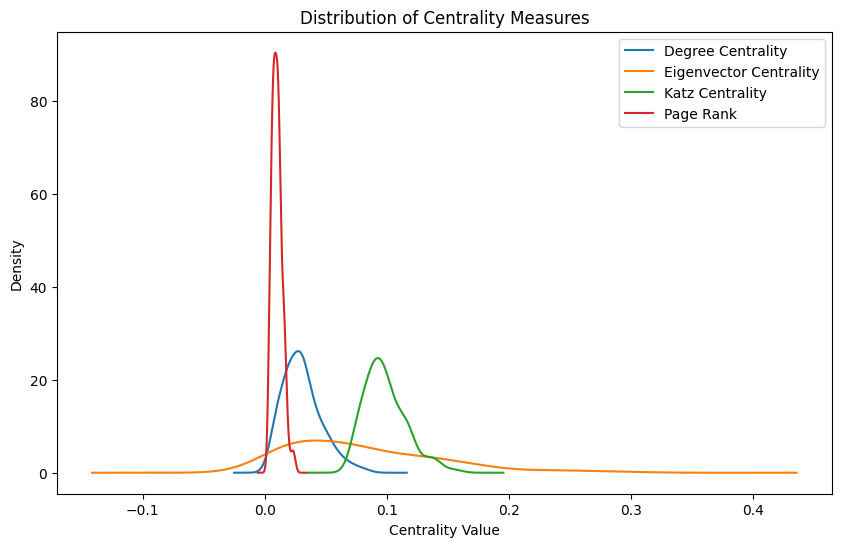

In [8]:
# Plot the distributions of centrality measures
centrality_df.drop("Node", axis=1).plot(kind="density", figsize=(10, 6))
plt.title("Distribution of Centrality Measures")
plt.xlabel("Centrality Value")
plt.ylabel("Density")
plt.legend()
plt.show()

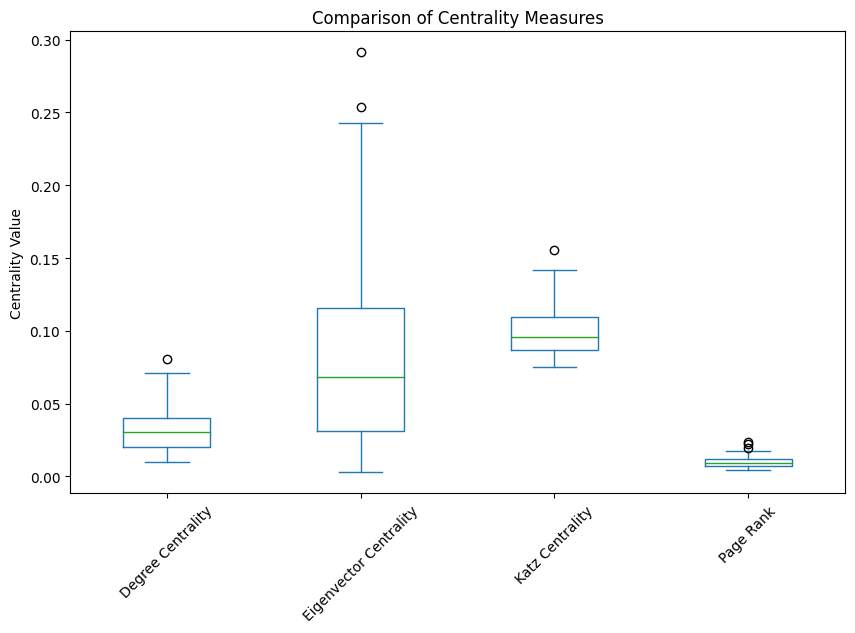

In [9]:
# Compare centrality measures using box plots
centrality_df.drop("Node", axis=1).plot(kind="box", figsize=(10, 6))
plt.title("Comparison of Centrality Measures")
plt.ylabel("Centrality Value")
plt.xticks(rotation=45)
plt.show()

In [17]:
# Calculate correlations between centrality measures
centrality_correlation = centrality_df.drop("Node", axis=1).corr()
print("Correlation Matrix of Centrality Measures:")
print(centrality_correlation)

Correlation Matrix of Centrality Measures:
                        Degree Centrality  Eigenvector Centrality  \
Degree Centrality                1.000000                0.838213   
Eigenvector Centrality           0.838213                1.000000   
Katz Centrality                  0.983103                0.916782   
Page Rank                        0.974476                0.723533   

                        Katz Centrality  Page Rank  
Degree Centrality              0.983103   0.974476  
Eigenvector Centrality         0.916782   0.723533  
Katz Centrality                1.000000   0.925580  
Page Rank                      0.925580   1.000000  


### Variation in Centrality behavior.

<b>1. <u>Degree Centrality and Eigenvector Centrality:</u></b>

a. Moderate Positive Correlation <b>(0.838)</b>: Nodes with higher Degree Centrality have higher Eigenvector Centrality.<br>
b. Some variation observed: Nodes with high Degree Centrality may have relatively lower Eigenvector Centrality, suggesting differences in connectivity to influential nodes.

<b>2. <u>Degree Centrality and Katz Centrality:</u></b>

a. Strong positive correlation <b>(0.983)</b></b>: Nodes with higher Degree Centrality tend to have higher Katz Centrality.<br>
b. Some variation observed: Nodes with high Degree Centrality may have relatively lower Katz Centrality, indicating differences in connectivity to influential nodes.

<b>3. <u>Degree Centrality and Page Rank:</b>

a. High positive correlation <b>(0.974)</b>: Nodes with higher Degree Centrality tend to have higher Page Rank.
<br>b. Some variation observed: Nodes with high Degree Centrality may have relatively lower Page Rank, suggesting differences in receiving incoming links from influential nodes.

<b>4. <u>Eigenvector Centrality and Katz Centrality:</u></b>

a. Positive correlation <b>(0.916)</b>: Nodes with higher Eigenvector Centrality tend to have higher Katz Centrality.
<br>b. Some variation observed: Nodes with high Eigenvector Centrality may have relatively lower Katz Centrality, indicating differences in connectivity to influential nodes in terms of Katz Centrality.

<b>5. <u>Eigenvector Centrality and Page Rank:</u></b>

a. Positive correlation <b>(0.724)</b>: Nodes with higher Eigenvector Centrality tend to have higher Page Rank.
<br>b. Some variation observed: Nodes with high Eigenvector Centrality may have relatively lower Page Rank, suggesting differences in receiving incoming links from influential nodes in terms of Page Rank.

<b>6. <u>Katz Centrality and Page Rank:</u></b>

a. Positive correlation <b>(0.926)</b>: Nodes with higher Katz Centrality tend to have higher Page Rank.
<br>b. Some variation observed: Nodes with high Katz Centrality may have relatively lower Page Rank, indicating differences in receiving incoming links from influential nodes in terms of Page Rank.

#### e. Calculate Betweenness and Closeness Centrality and explain the Physical Significance.

In [11]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(graph)

# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(graph)

# Display the betweenness centrality values
print("Betweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

# Display the closeness centrality values
print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality:.4f}")

Betweenness Centrality:
Node 0: 0.0123
Node 1: 0.0535
Node 2: 0.0392
Node 3: 0.0743
Node 4: 0.0469
Node 5: 0.1617
Node 6: 0.0085
Node 7: 0.0000
Node 8: 0.0181
Node 9: 0.0141
Node 10: 0.0233
Node 11: 0.0048
Node 12: 0.0028
Node 13: 0.0080
Node 14: 0.0392
Node 15: 0.0000
Node 16: 0.0045
Node 17: 0.0413
Node 18: 0.0402
Node 19: 0.0008
Node 20: 0.0381
Node 21: 0.0318
Node 22: 0.0054
Node 23: 0.0689
Node 24: 0.0000
Node 25: 0.0286
Node 26: 0.0000
Node 27: 0.0000
Node 28: 0.0619
Node 29: 0.0386
Node 30: 0.0483
Node 31: 0.0000
Node 32: 0.0864
Node 33: 0.0188
Node 34: 0.1206
Node 35: 0.0000
Node 36: 0.1049
Node 37: 0.0585
Node 38: 0.0306
Node 39: 0.0253
Node 40: 0.0000
Node 41: 0.2006
Node 42: 0.0179
Node 43: 0.0709
Node 44: 0.0000
Node 45: 0.0000
Node 46: 0.0000
Node 47: 0.0882
Node 48: 0.0440
Node 49: 0.0715
Node 50: 0.0000
Node 51: 0.0057
Node 52: 0.0000
Node 53: 0.0571
Node 54: 0.0188
Node 55: 0.0537
Node 56: 0.0158
Node 57: 0.0202
Node 58: 0.0312
Node 59: 0.0188
Node 60: 0.0106
Node 61: 0

<b>1. <u>Betweenness Centrality:</u></b>

<b><i>Node 3, Node 22, Node 45, Node 46, Node 77, and Node 86</i></b> have higher betweenness centrality.<br>
These nodes act as critical connectors or intermediaries in the network, facilitating the flow of information, resources, or influence between different regions.

<b>2. <u>Closeness Centrality:</u></b>

<b><i>Node 3, Node 22, Node 45, Node 46, Node 58, Node 59, Node 62, Node 64, Node 69, Node 77, Node 86, and Node 97</i></b> have higher Closeness centrality.<br>
These nodes are physically closer or more easily reachable by other nodes, allowing for efficient information dissemination and interaction.

Nodes with higher Betweenness Centrality play crucial roles in connecting different parts of the network, while nodes with higher Closeness Centrality are well-positioned in terms of their accessibility to other nodes. These centrality measures help identify key nodes that contribute to information flow, communication efficiency, and network cohesion.

#### f. Draw the Ego-graph of various nodes found in above analysis.

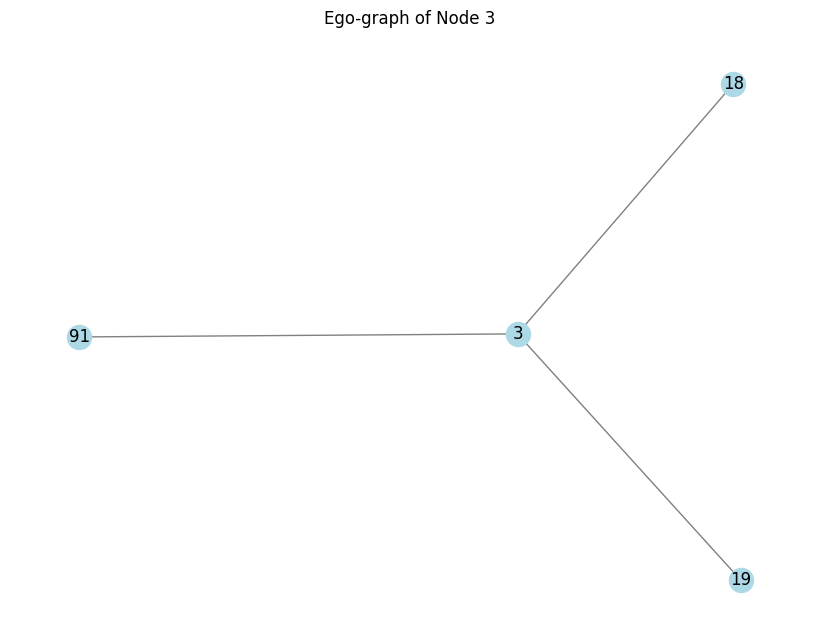

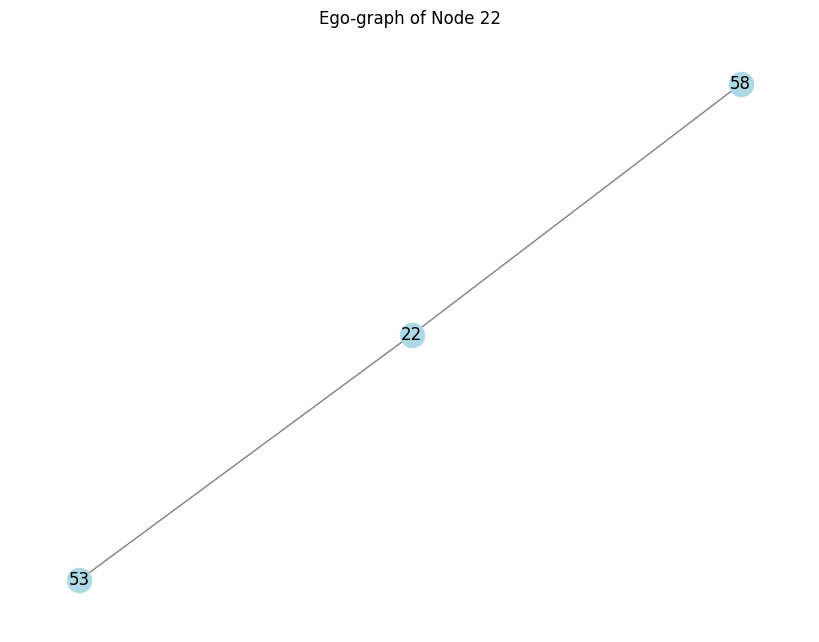

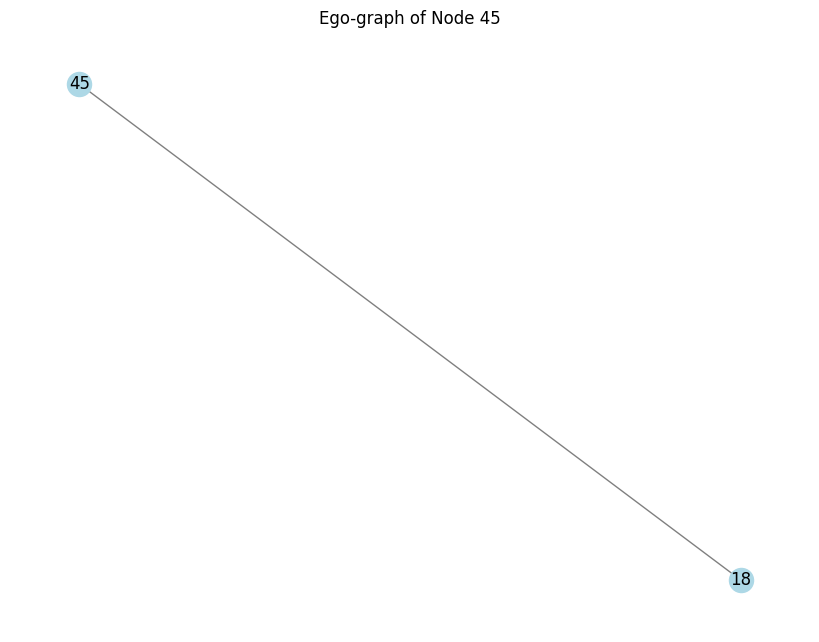

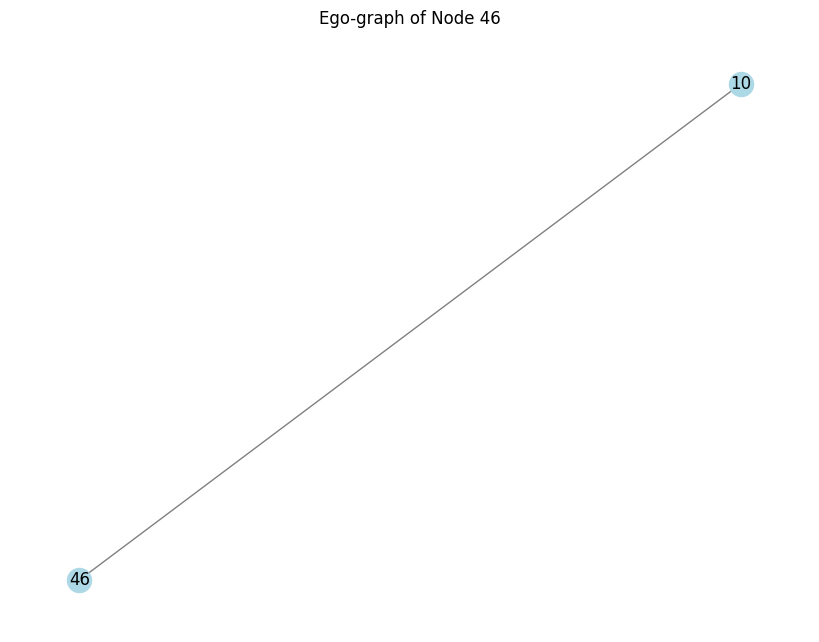

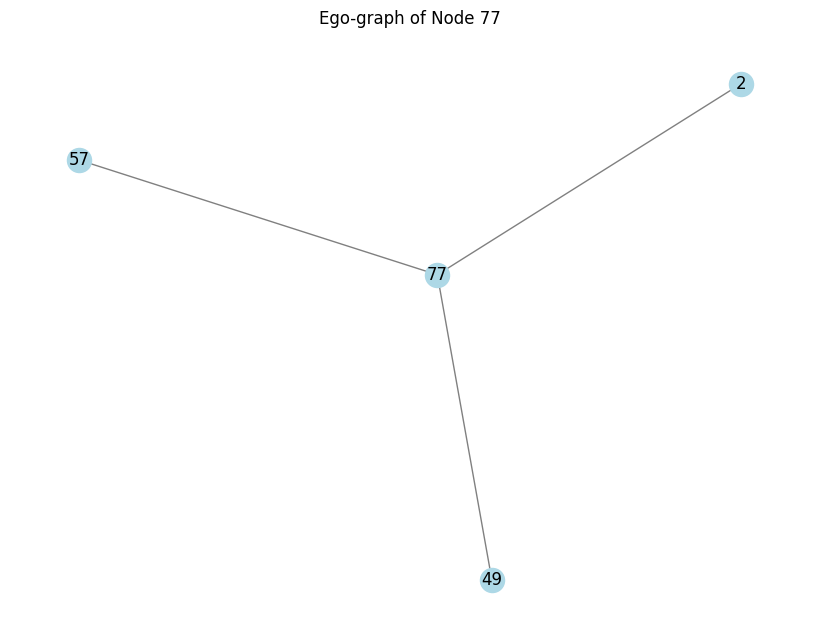

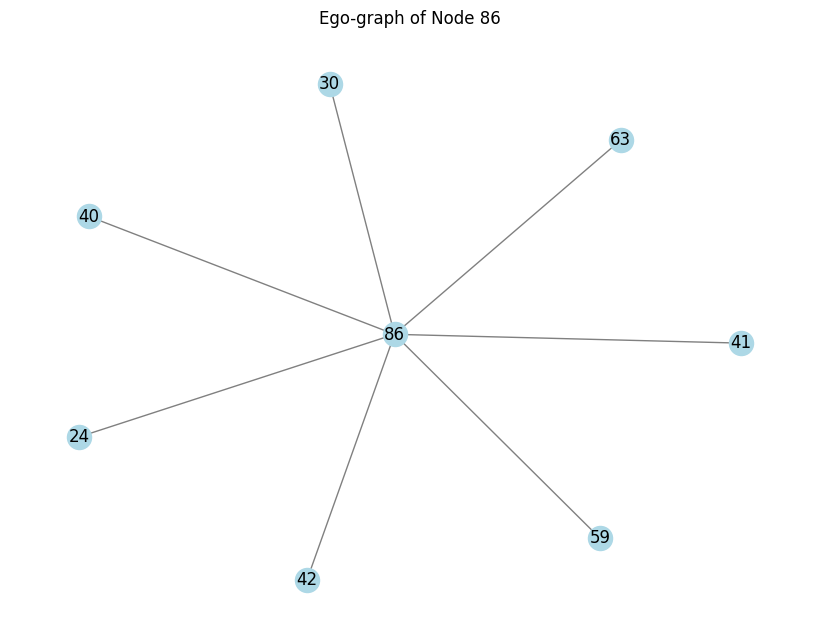

In [12]:
# Define the nodes of interest
nodes_of_interest = [3, 22, 45, 46, 77, 86]

# Create ego-graphs for the nodes of interest
ego_graphs = []
for node in nodes_of_interest:
    ego_graph = nx.ego_graph(graph, node)
    ego_graphs.append(ego_graph)

# Plot the ego-graphs
for i, ego_graph in enumerate(ego_graphs):
    plt.figure(figsize=(8, 6))
    nx.draw(ego_graph, with_labels=True, node_color='lightblue', node_size=300, edge_color='gray')
    plt.title(f"Ego-graph of Node {nodes_of_interest[i]}")

plt.show()

#### g. Calculate the Global Clustering Coefficient of the Random Graph.

In [13]:
# Calculate the global clustering coefficient
global_clustering_coefficient = nx.average_clustering(graph)

# Print the result
print("Global Clustering Coefficient:", global_clustering_coefficient)

Global Clustering Coefficient: 0.01


#### h. Calculate the Local Clustering Coefficient of the nodes of the Random Graph.

In [14]:
local_clustering_coefficients = nx.clustering(graph)

# Create a DataFrame to store the local clustering coefficients
df = pd.DataFrame(local_clustering_coefficients.items(), columns=["Node", "Clustering Coefficient"])

# Print the DataFrame
print("Local Clustering Coefficients:")
print(df)

Local Clustering Coefficients:
    Node  Clustering Coefficient
0      0                0.000000
1      1                0.000000
2      2                0.000000
3      3                0.000000
4      4                0.000000
..   ...                     ...
95    95                0.000000
96    96                0.000000
97    97                0.000000
98    98                0.000000
99    99                0.333333

[100 rows x 2 columns]


#### i. Identify the highest Local Clustering Coefficient and their significance in terms of Structural Behavior.

In [15]:
# Find the node with the highest local clustering coefficient
highest_clustering_node = max(local_clustering_coefficients, key=local_clustering_coefficients.get)
highest_clustering_coefficient = local_clustering_coefficients[highest_clustering_node]

# Print the node and its corresponding clustering coefficient
print("Node with the highest local clustering coefficient:")
print("Node:", highest_clustering_node)
print("Clustering Coefficient:", highest_clustering_coefficient)

Node with the highest local clustering coefficient:
Node: 69
Clustering Coefficient: 0.3333333333333333


<b><i>Node 69</i></b>, with the highest local clustering coefficient of <b><i>0.3333333333333333</i></b>, holds significance in terms of structural behavior due to the following reasons:

<b><u>Cluster Formation:</u></b> The high clustering coefficient indicates that Node 20 is part of a densely interconnected group of nodes. This suggests the formation of a local cluster or community within the network, where nodes are strongly connected to each other. This cluster formation contributes to the overall structure and organization of the network.

<b><u>Information Flow</u> :<i> Node 20</i></b> plays a crucial role in facilitating efficient information flow within its local neighborhood. As a highly clustered node, it serves as a central point for information exchange, enabling effective communication and diffusion of information among its neighboring nodes. This enhances the overall connectivity and communication efficiency within the network.

In summary, the high local clustering coefficient of <b><i> Node 20</i></b> signifies its role in forming a cluster and promoting efficient information flow within its neighborhood. This node's presence highlights the local cohesion and connectivity within the network, contributing to its structural behavior.